In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [47]:
filename = "../data/sorghum_ISU_656034_1_test_20241209-192728.npz"
filename = "../data/sorghum_ISU_656034_1_test_long_pulse_20241209-194328.npz"
# filename = "../data/sorghum_ISU_656034_1_test_longer_pulse_20241209-195547.npz"
data = np.load(filename)

In [48]:
vis_frames = data["ls_vis_frames"].astype(np.float32) / data["ls_vis_exposures"][:, None, None]
vis_tstamps = data["ls_vis_tstamps"]

thr_frames = data["ls_thr_frames"].astype(np.float32)[:, :, ::-1]
thr_tstamps = data["ls_thr_tstamps"]

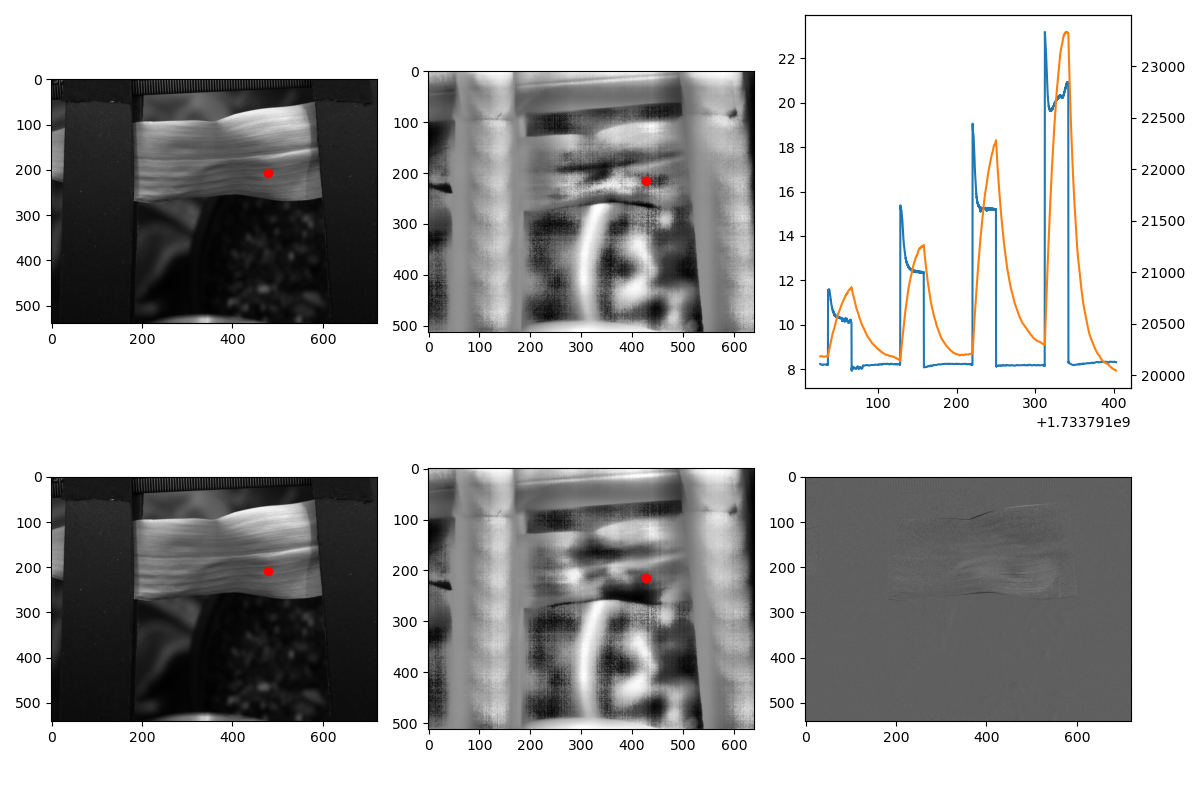

In [49]:
from skimage.exposure import equalize_adapthist, rescale_intensity
py1_v, px1_v = 208, 479
py1_t, px1_t = 215, 427

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax[0, 0].imshow(vis_frames[0, :, :], cmap="gray")
ax[0, 0].scatter(px1_v, py1_v, c="r")

ax[0, 1].imshow(equalize_adapthist(rescale_intensity(thr_frames[0, :, :]), clip_limit=0.3), cmap="gray")
ax[0, 1].scatter(px1_t, py1_t, c="r")

ax[0, 2].plot(vis_tstamps, vis_frames[:, py1_v-5:py1_v+5, px1_v-5:px1_v+5].mean(axis=(1, 2)), label="VIS", color="tab:blue")
ax2 = ax[0, 2].twinx()
ax2.plot(thr_tstamps, thr_frames[:, py1_t-5:py1_t+5, px1_t-5:px1_t+5].mean(axis=(1, 2)), label="THR", color="tab:orange")

ax[1, 0].imshow(vis_frames[-1, :, :], cmap="gray")
ax[1, 0].scatter(px1_v, py1_v, c="r")

ax[1, 1].imshow(equalize_adapthist(rescale_intensity(thr_frames[-1, :, :]), clip_limit=0.3), cmap="gray")
ax[1, 1].scatter(px1_t, py1_t, c="r")

vis_diff_img = vis_frames[-1, :, :] - vis_frames[0, :, :]
ax[1, 2].imshow(vis_diff_img, cmap="gray")

# thr_diff_img = thr_frames[-1, :, :] - thr_frames[0, :, :]
# thr_diff_img_normed = (thr_diff_img - thr_diff_img.min()) / (thr_diff_img.max() - thr_diff_img.min())
# ax[1, 2].imshow(equalize_adapthist(thr_diff_img_normed), cmap="gray")

plt.tight_layout()
plt.show()